# Data Visualization in Python

## Outcomes
This notebook is structured as follows:

* Introduction to graphs and their various forms.
* Plotting graphs.
* Importing data and data preparation.
* Bar graphs and Pie charts. 
* Line graphs and Scatter plots.
* Histograms.
* Jointplots.
* Box plots.
* Violin plots.
* Facet Grid.
* Conclusion.

## Introduction


Data visualisation is the process of representing data and information in a graphical format such as charts, maps and diagrams. The objective of these visuals is to increase understanding of the underlying data; allowing patterns, trends, relationships and outliers to be recognised more readily than an inspection of the raw data alone can provide.    

There will be many situations where you will have to present your data driven findings and insights. Unfortunately, raw data are not well suited for this purpose. This is where harnessing the full potential of data visualisation becomes pivotal. In this notebook, we will learn how to visualise data using Python's graphing package `matplotlib`, as well as how to determine the best visualisation techniques to use based on the data you are presented with.

## Different Kinds of Charts:

There are many different ways to represent the same data, and the choice of visualisation affects what information is conveyed to the audience. In this train, we will walk you through some of the most basic (yet useful and reliable) chart options. Below is an image depicting some of the most popular charts used for data visualisation. 


<img src="https://github.com/Explore-AI/Pictures/blob/master/Data_visualisation.jpg?raw=true" style="float: center; padding-bottom=0.5em" width=80%/>

## Plotting Graphs

In this section, we'll learn how to plot some of these graphs in Python using the `matplotlib` library.

We will begin by importing some commonly used Python libraries. 

In [11]:
# Import libraries 
import matplotlib.pyplot as plt #used for plotting data 
import numpy as np #used for mathematical operations
import pandas as pd #used to loading CSV data
import seaborn as sns
sns.set_palette("Spectral_r",n_colors=4) # set our colour palette preference

### Import data

We will be using [the tips](https://www.kaggle.com/jsphyg/tipping) dataset, which consists of customer tip data collected over a period of two and half months in early 1990 from one restaurant by a food server.

Let's go ahead and import our data.

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/tips.csv")

### Data preparation

In [4]:
df.head() #First 5 rows of data 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
title_day = df.groupby('day').sum() #group and sum data by the number of values for each ‘day’ category
print(title_day)

      total_bill     tip  size
day                           
Fri       325.88   51.96    40
Sat      1778.40  260.40   219
Sun      1627.16  247.39   216
Thur     1096.33  171.83   152


In [7]:
week_day = title_day.total_bill.sort_values().index #sort the indices 
bill = title_day.total_bill.sort_values() 

In [8]:
print(bill)

day
Fri      325.88
Thur    1096.33
Sun     1627.16
Sat     1778.40
Name: total_bill, dtype: float64


### Bar graph

From the data provided, we can find out which days of the week the restaurant was the busiest and made the most amount of money. 
We can visualise this data using a bar graph as follows:

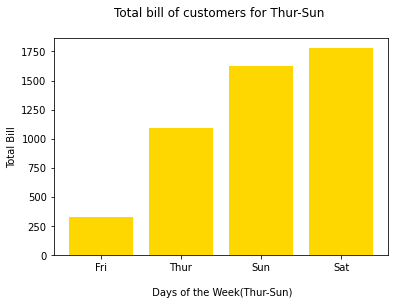

In [9]:
# Plot total bill (y-axis) for day of the week (x-axis) 
# We only have to call a single line of code from matplotlib to produce the base graph. 
plt.bar(week_day, bill, color= 'gold')

# Set x and y axis titles
plt.ylabel('Total Bill')
plt.xlabel('\n Days of the Week(Thur-Sun)') # Note: '\n' creates a newline (try removing it and see what happens)  

# Set graph title
plt.title('Total bill of customers for Thur-Sun \n')

# Show graph
plt.show()

**Analysis**: From the bar graph, we can see that the restaurant makes most of its money on the weekend. This is expected as Saturday and Sunday are usually the busiest days of the week for restaurants as people are off from work.  

### Pie chart

Next, we will plot a **pie chart** showing the proportion of the total meals served at the restaurant, and determine during which mealtime the server earned the most in tips.  

In [8]:
title_time = df.groupby('time').sum() # Group and sum data by the number of values for each ‘time’ category
print(title_time)

        total_bill     tip  size
time                            
Dinner     3660.30  546.07   463
Lunch      1167.47  185.51   164


In [9]:
meal_time = title_time.tip.sort_values().index #Sort the indices 
tips = title_time.tip.sort_values() 

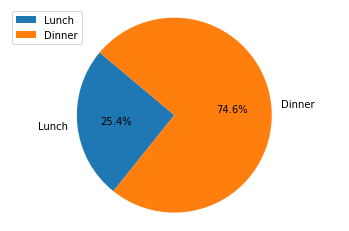

In [10]:
# Plot a pie chart
# The `autopct` argument defines the format applied to the data labels. 
# The `startangle` argument determines which point in the pie to start plotting proportions from. 
# Full plot documentation can be found here: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html 
plt.pie(tips, labels = meal_time, autopct='%1.1f%%',  startangle=140)

# Place the chart legend in a position which does not overlap with other components. 
plt.legend(loc="best")
plt.axis('equal')
plt.show()

### Pie vs Donut charts

Donut charts are quite similar to pie charts except they contain a hole in its center, and displays categories as arcs rather than slices. Donut charts are considered easier to interpret visually in comparison to pie charts. Let's visualise the same data using a **donut chart**. 

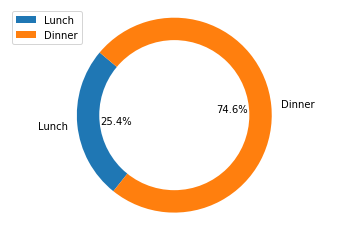

In [11]:
#Plot a donut chart

# Initially we create a pie chart as the base of our donut chart. 
plt.pie(tips, labels=meal_time, autopct='%1.1f%%', startangle=140)

# Next, we create a circle at the center of the base plot
centre_circle = plt.Circle((0,0),0.77, fc='white',linewidth=1.25)
fig = plt.gcf() # <-- Matplotlib command to get the current figure for further manipulation. 
# Add the circle to our base pie chart
fig.gca().add_artist(centre_circle)

plt.legend(loc="best")
plt.axis('equal')
plt.show()

**Analysis**: From both the pie and donut chart, we can see that Dinner was definitely the most profitable meal time for the server. 

Having learnt how to plot both pie and donut charts you can now use personal preference to decide which is more visually appealing and easy to interpret in your own data analysis projects. 

### Line graph

Suppose we now want to see how many meals were sold over 6 months at this busy restaurant. We can go ahead and a create a dictionary of this information based on the `total_meals` sold at the restaurant from January to June 1990.  

In [12]:
total_meals = {'31/01/1990': 1340, '28/02/1990': 1338, '31/03/1990': 1330, '30/04/1990': 1328, '31/05/1990': 1335, '30/06/1990': 1335}

To visualise this data we can use a **line graph**:

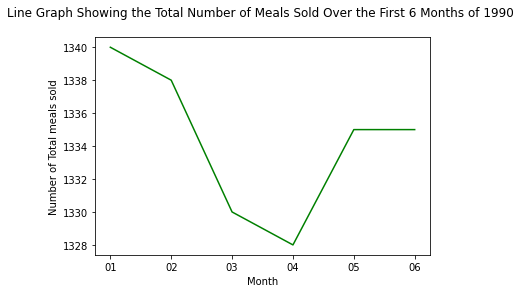

In [13]:
dates = list(total_meals.keys()) # Extract the dates (the dictionary keys of our data in this case)
x_ax = [date[3:5] for date in dates] # Extract the month from each date string
y_ax = list(total_meals.values()) # Extract the total number of meals consumed on each date as a Python list

# Plot the line graph
plt.plot(x_ax, y_ax, color='green') 

# Set axis and graph titles
plt.xlabel('Month')
plt.ylabel('Number of Total meals sold')
plt.title('Line Graph Showing the Total Number of Meals Sold Over the First 6 Months of 1990 \n')

plt.show()

**Analysis**: From the line plot, we observe successive decreases in the number of meals sold from January to April, with this last month representing the lowest number of sales. This is not coincidental as the Easter holidays are usually celebrated in April where people enjoy spending time with family and feasting on home cooked meals instead of going out. 

### Scatter plot
As a final visual analysis, we will investigate if there is a relationship between the size of a group which visits the restaurant and the amount that the server gets tipped from this group. We can visually consider this relationship using a **scatter plot**.

Scatter plots are a powerful form of visualisation which allow us to view many data points at once. Typically, two variables are considered for a given dataset, with x and y-axis cartesian coordinates being used to place markers representing the data.  Additional variables can also be represented by adding further visual properties to the markers,  such as modifying their size, shape or colour.    

In the case of our scatter plot, we seek to observe both the bill total and the associated tip received for each data entry, and to code these values based upon the related group size. We can use the first two variables for the plot's x and y-axis respectively, and can represent the group size variable by using different marker colours.        


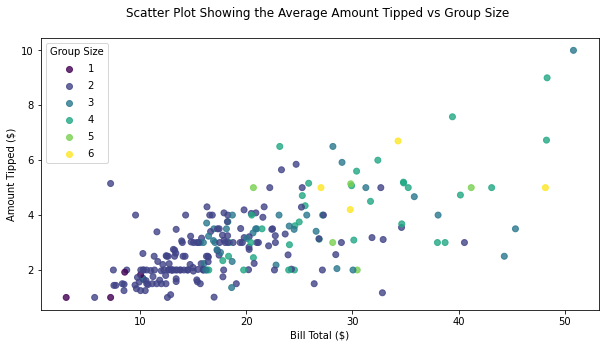

In [14]:
# For this plot, we need to access the underlying Axes object used to create our chart. 
# To display our data correctly, we also set the `figsize` argument to increase the size of the plot. 
fig, ax = plt.subplots(figsize=(10,5))

# Create the scatter plot, with the 'size' variable being coded as the marker colour. 
# We set the `alpha` parameter to make the markers slightly transparent to view overlapping points. 
scatter = ax.scatter(df['total_bill'], df['tip'], c=df['size'], alpha=0.8)

# We now create our legend based upon the underlying group size and colour assignments.
ax.legend(*scatter.legend_elements(), loc="best", title="Group Size")

# Set graph and axis titles
plt.title('Scatter Plot Showing the Average Amount Tipped vs Group Size \n')
plt.xlabel('Bill Total ($)')
plt.ylabel('Amount Tipped ($)')

plt.show()

**Analysis**: This chart holds much information! Firstly, we see a general trend that as the group size increases, so does the bill total and the amount tipped. Interestingly, the scatter plot fans out in a cone shape, indicating that as the bill increases there is also more variance in the tips produced. Lastly, it is also surprising to note that the highest tips produced come from mid-sized groups (3-4 individuals. This may represent a dynamic where larger groups tend to both order and tip less, based on the fact that the bill is either being generously picked up by one group member, or split by the group as a whole. It's important to note that this last point is an assumption, however, and cannot be supported by the chart alone - highlighting the need for further data driven analysis which often accompanies the evaluation of a visualisation.    

# Conclusion

In this notebook, we outlined some of the basic types of graphs and how to effectively use them. The following was covered:

* Understanding when to use a particular graph.
* Plotting graphs using the `matplotlib` library in Python.
* Interpreting graphs.

Learning how to properly represent your data to expose insights is undeniably one of the most essential skills that a data scientist should possess. 


<br>

# Advanced Visualisations in Python

Pandas DataFrames are a great way to wrangle data, but to see trends and patterns, find key insights and identify outliers in the data, it generally helps to visualise them in a meaningful way. Python has some of the best graphing packages available to facilitate this. ```matplotlib``` and ```seaborn``` are two of the most commonly used packages for a variety of visualisations. Visualisations are a vital tool for presenting your data. Next, we will show you a demonstration of a number of useful visualisations.

In this section, we work with Pandas DataFrames and perform some advanced visualisations to draw insights. We're going to need and loading a dataset about football players and their statistics.

In [3]:
soccer = pd.read_csv("https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/fundamentals/football_players.csv",low_memory=False)

In [5]:
# Changing some columns to numerical values

cols = ['Age', 'Overall', 'Acceleration', 'Aggression',
       'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve',
       'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving',
       'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
       'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
       'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
       'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
       'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']

soccer[cols] = soccer[cols].apply(pd.to_numeric, errors='coerce', axis=1)

The following code block shows the first 10 rows of the DataFrame. Try changing the number in the brackets to see what happens!

In [4]:
soccer.head()

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,89,63,89,63,93,95,...,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30,Argentina,93,92,48,90,95,95,96,...,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,Brazil,92,94,56,96,82,95,92,...,81,80,33,90,78,24,53,80,83,LW
3,L. Suárez,30,Uruguay,92,88,78,86,60,91,83,...,83,87,38,77,89,45,80,84,88,ST
4,M. Neuer,31,Germany,92,58,29,52,35,48,70,...,55,25,11,61,44,10,83,70,11,GK


Let's have a look at the descriptive statistics of each column to see if we can spot any anomalies.

In [9]:
soccer.describe()

,Age,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
count,17981.000000,17981.000000,17926.000000,17928.00000,17937.000000,17941.000000,17888.000000,17923.000000,17915.000000,17920.000000,...,17914.000000,17876.000000,17929.000000,17918.000000,17906.000000,17915.000000,17901.000000,17913.000000,17904.000000,17950.000000
mean,25.144541,66.247984,103.446893,77.59923,98.150248,86.616911,121.420338,103.764995,86.550600,62.586496,...,121.637937,115.298557,83.046796,89.598672,119.034849,123.126151,109.390425,116.040138,91.195878,54.622507
std,4.614272,6.987965,986.386054,768.79730,910.809847,752.123941,1236.108966,1028.086556,912.376407,623.794730,...,1161.367097,1157.803920,811.145271,1074.217147,1185.940156,1261.551333,1286.912547,1148.520031,945.840135,523.716920
min,16.000000,46.000000,11.000000,11.00000,14.000000,11.000000,8.000000,5.000000,5.000000,6.000000,...,28.000000,10.000000,3.000000,4.000000,11.000000,12.000000,4.000000,12.000000,10.000000,4.000000
25%,21.000000,62.000000,56.000000,43.00000,55.000000,56.000000,53.000000,51.000000,38.000000,34.000000,...,55.250000,53.000000,46.000000,24.000000,57.000000,56.000000,26.000000,58.000000,43.000000,30.000000
50%,25.000000,66.000000,67.000000,59.00000,65.000000,66.000000,63.000000,60.000000,54.000000,48.000000,...,62.000000,62.000000,59.000000,51.000000,67.000000,66.000000,54.000000,66.000000,54.000000,44.000000
75%,28.000000,71.000000,75.000000,69.00000,74.000000,74.000000,69.000000,67.000000,64.000000,62.000000,...,68.000000,68.000000,69.000000,64.000000,75.000000,74.000000,66.000000,74.000000,64.000000,57.000000
max,47.000000,94.000000,33270.000000,43130.00000,30164.000000,31472.000000,43145.000000,27150.000000,27150.000000,43131.000000,...,27760.000000,28856.000000,29677.000000,43372.000000,32905.000000,43433.000000,43144.000000,31868.000000,28216.000000,43129.000000


It would appear that we have `17981` entries in total, with some `NaN` values and some values that fall outside of the expected stats range.

We would have difficulty comparing an acceleration score of 67 with an anomaly score of 33270, where we expected all scores to fall below 100.

Let's convert all statistics > 100 to `NaN` and see the summary statistics again.

In [10]:
for column in soccer.describe().columns:
    soccer[column] = soccer[column].apply(lambda x: x if x<=100 else np.nan)
    
soccer.describe()

,Age,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
count,17981.000000,17981.000000,17897.000000,17913.000000,17910.000000,17924.000000,17840.000000,17887.000000,17885.000000,17908.000000,...,17866.000000,17832.000000,17908.000000,17886.000000,17867.000000,17873.000000,17857.000000,17877.000000,17874.000000,17940.000000
mean,25.144541,66.247984,64.576521,55.791492,63.333613,63.803894,58.071469,57.877341,49.725301,47.261112,...,61.898802,58.263964,55.622292,45.496645,64.795713,63.233201,47.352187,65.279130,52.967495,43.198495
std,4.614272,6.987965,14.918313,17.476572,14.802800,14.100950,16.834554,12.938165,18.474237,18.463394,...,9.176709,14.947943,17.408483,21.489926,14.649127,15.942738,21.851023,12.618415,14.387015,17.734259
min,16.000000,46.000000,11.000000,11.000000,14.000000,11.000000,8.000000,5.000000,5.000000,6.000000,...,28.000000,10.000000,3.000000,4.000000,11.000000,12.000000,4.000000,12.000000,10.000000,4.000000
25%,21.000000,62.000000,56.000000,43.000000,55.000000,56.000000,53.000000,51.000000,37.000000,34.000000,...,55.000000,53.000000,46.000000,23.000000,57.000000,56.000000,26.000000,58.000000,43.000000,30.000000
50%,25.000000,66.000000,67.000000,59.000000,65.000000,66.000000,63.000000,60.000000,54.000000,48.000000,...,62.000000,62.000000,59.000000,51.000000,67.000000,66.000000,54.000000,66.000000,54.000000,44.000000
75%,28.000000,71.000000,75.000000,69.000000,74.000000,74.000000,69.000000,67.000000,64.000000,62.000000,...,68.000000,68.000000,69.000000,64.000000,75.000000,74.000000,66.000000,74.000000,64.000000,57.000000
max,47.000000,94.000000,96.000000,96.000000,96.000000,96.000000,95.000000,96.000000,91.000000,92.000000,...,96.000000,92.000000,94.000000,91.000000,96.000000,95.000000,92.000000,98.000000,94.000000,91.000000


<br>

## Histogram

A histogram is very similar to a bar chart except that it **groups** data or puts it into **ranges**. These groupings/ranges are called "**bins**".

`seaborn` and ```matplotlib``` have their own histogram functions. ```seaborn``` will combine the histogram with a distribution if prompted to do so.
If you want to display the distribution, simply add the argument ```kde=True``` to your plot.

Can you think of why a distribution will be related to histogram?

Let's look at how to graph a histogram in both `matplotlib` and `seaborn` below.

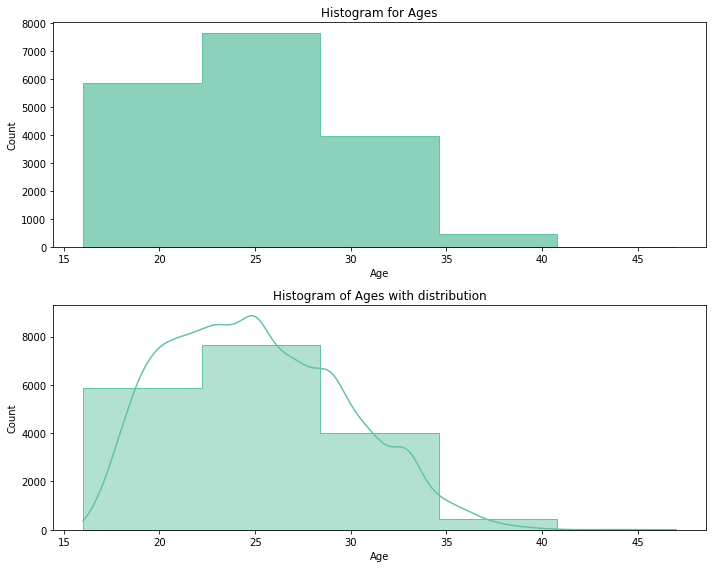

In [12]:
fig, ax = plt.subplots(2,1, figsize=(10,8)) 

sns.histplot(soccer['Age'], bins=5, element="step", ax=ax[0]) 
sns.histplot(soccer['Age'], bins=5, element="step", kde=True, ax=ax[1]) 

ax[0].set_title('Histogram for Ages')
ax[1].set_title('Histogram of Ages with distribution')

plt.tight_layout()
plt.show()

## Jointplots

```seaborn```'s _jointplot_ will graphically display two variables on one plot and a single variable on the marginal sides of the graph. Essentially, a _jointplot_ allows you to see the relationship between two variables as well as each variable independently. Let's see the example below: 

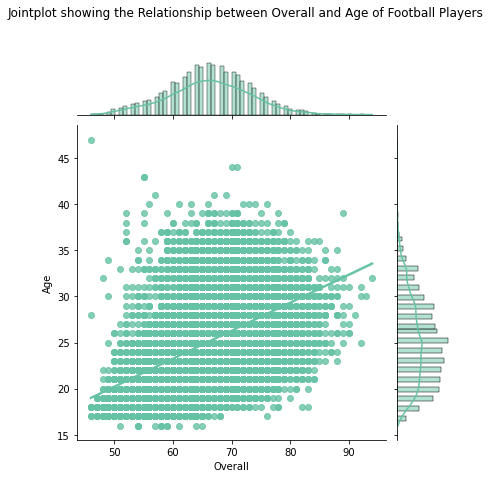

In [19]:
j = sns.jointplot(data=soccer, x='Overall', y='Age', kind='reg')
plt.suptitle('Jointplot showing the Relationship between Overall and Age of Football Players', y=1.1)
plt.show()

In the graph above, it is still difficult to see how the `Overall` and `Age` variables are related. To improve this, we can try changing the type of plot or _kind_ to a hexagon, which displays the number of matching points much more clearly. 

Looking at the code below, we added the argument ```kind='hex'```.

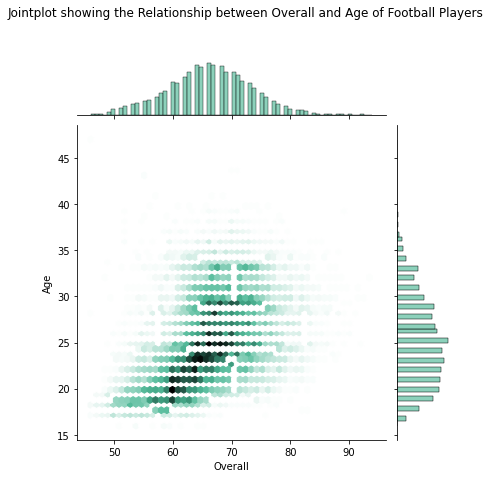

In [20]:
j = sns.jointplot(data=soccer, x='Overall', y='Age', kind='hex')
plt.suptitle('Jointplot showing the Relationship between Overall and Age of Football Players', y=1.1)
plt.show()

## Box plots

Box plots are used to show the spread of data. The main difference between a box plot and a histogram (which also shows a distribution as mentioned above) is that it takes up less space to plot. Box plots are constructed using the 5 number summary is indicated below:

```{Lower Extreme ; Q1 ; Median ; Q3 ; Upper Extreme}```

![](https://upload.wikimedia.org/wikipedia/commons/5/5c/Labeled_Box_and_Whisker_Plot.png)

Let's see how the `Overall` stats compare based on different ages (from 23-26 years old):


In [21]:
young_players = soccer[(soccer['Age'] > 22) & (soccer['Age'] < 27)] #filter ages

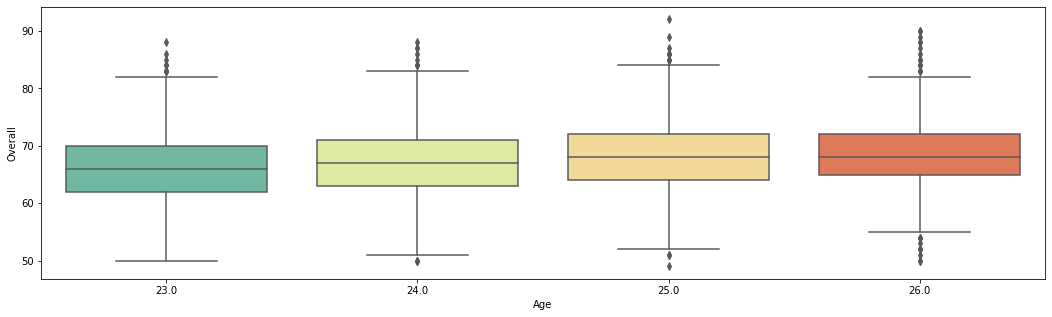

In [22]:
plt.figure(figsize=(18,5))

sns.boxplot(data=young_players, x='Age', y='Overall')
plt.show()

From the plot above, we can see the general trends of `Overall` stats for each specific age. Box plots, compared to histograms, can make it much easier to compare groupings of data.

## Violin Plot

Violin plots are similar to box plots, but they use the KDE or distribution of values for groupings instead in addition to a box (the box is still present within each graph). Let's plot one using ```seaborn``` and the `Overall` stats for various `Age` categories (from 23 - 26 years old).

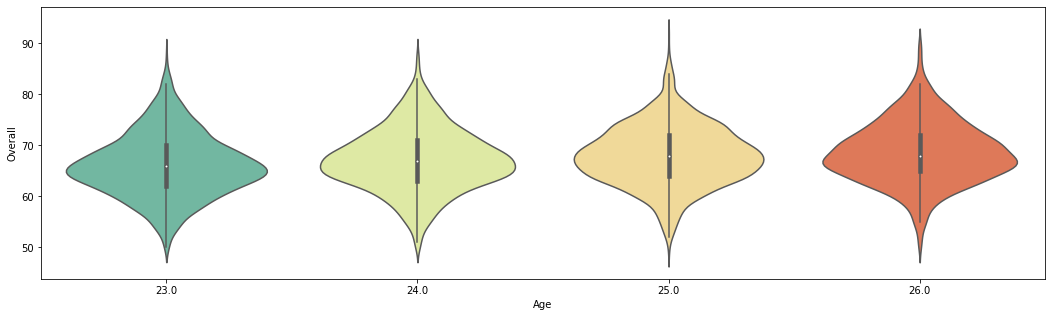

In [23]:
plt.figure(figsize=(18,5))

sns.violinplot(data=young_players, x='Age', y='Overall')
plt.show()

The violin plots show us general distribution across each age, and it makes it much easier for us to compare them.

## Facet grid

Sometimes a useful approach (specifically when exploring medium-dimensional data) is to draw the same plot (a facet) on multiple subsets of your dataset, resulting in a matrix of visualisations (a facet grid). This technique is commonly referred to as “lattice”, or “trellis” plotting, and it is related to the idea of _small multiples_. Your data will need to be in a Pandas DataFrame.

In [26]:
goalkeepers = soccer[soccer['Preferred Positions'].str.contains('GK'))]

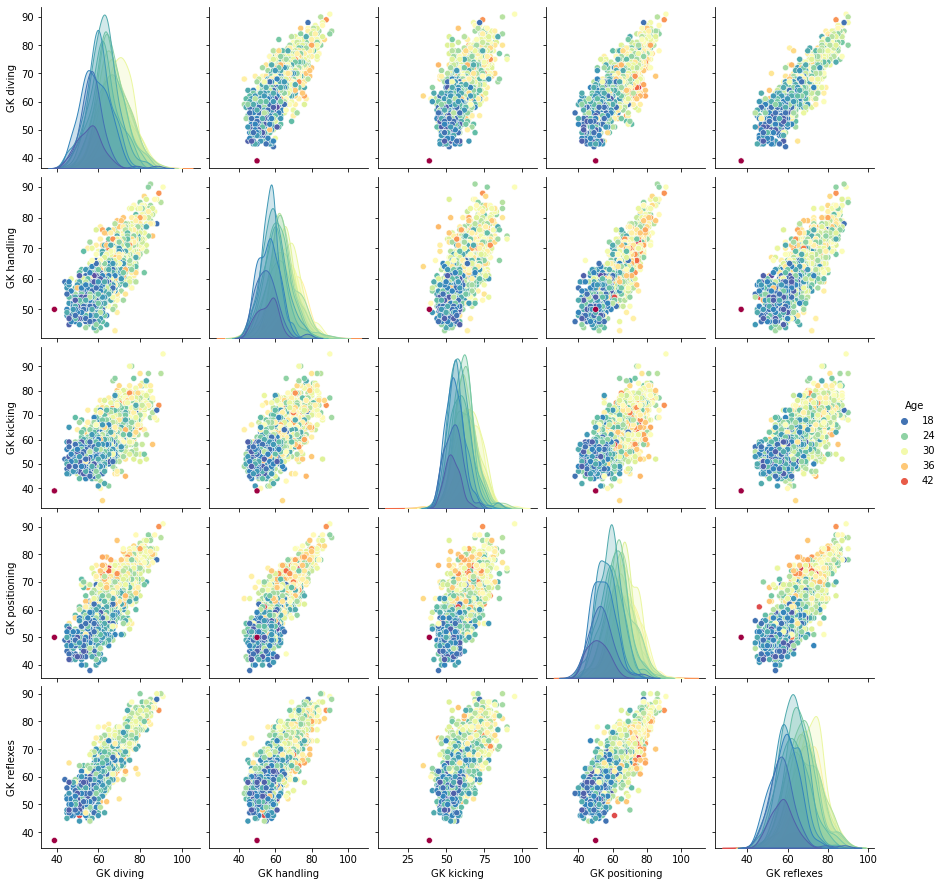

In [27]:
sns.pairplot(goalkeepers[['Age','GK diving','GK handling', 'GK kicking', 'GK positioning', 'GK reflexes']],
             hue='Age',palette="Spectral_r")
plt.show()

To practice further, we will work with one of the practice datasets in ```seaborn```.

In [ ]:
tips = sns.load_dataset("tips")

g = sns.FacetGrid(tips, col="day")
g.map(plt.hist, "total_bill");
plt.show()

In [ ]:
g = sns.FacetGrid(tips, col="day", row="sex")
g.map(plt.hist, "total_bill");
plt.show()

# Conclusion 

Data visualisation is the act of taking information (data) and placing it into a visual context - such as a map or graph - to make sense of it Data visualisations make it simpler for the human brain to understand data, making it easier to detect patterns, trends, and outliers.

In this train, you learned the following:
* How to navigate a Pandas DataFrame
* How to slice a Pandas DataFrame
* How to produce advanced visualisations in Python


After completing this, we know how to effectively visualise your data with ```seaborn``` and ```matplotlib```. 

# Appendix
Links to additional resources to help with the understanding of concepts presented in the train: 

* [Types of graphs for data visualisation](https://blog.hubspot.com/marketing/types-of-graphs-for-data-visualization)

* [Data visualisation in Python](https://www.geeksforgeeks.org/data-visualization-different-charts-python/)